In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import sys
import numpy as np
import warnings

sys.path.append('/Vol0/user/a.vorontsova/FlavorNet/utilities/slam_metrics')
sys.path.append('/Vol0/user/a.vorontsova/FlavorNet/utils')
sys.path.append('/Vol0/user/a.vorontsova/FlavorNet/utils/prepare_datasets/struct2depth')
sys.path.append('/Vol0/user/a.vorontsova/FlavorNet/utils/prepare_datasets/depth_pred')
sys.path.append('/Vol0/user/a.vorontsova/FlavorNet/tfoptflow/tfoptflow')

warnings.simplefilter('ignore')

In [4]:
image_directory = None
depth_directory = None
video_path = None
json_path = None
csv_path = None
txt_path = None

optical_flow_estimator_name = 'pwc'
depth_estimator_name = 'struct2depth'
#depth_estimator_name = 'senet'

computation_kwargs = dict(
    cuda_visible_devices=3,
)

In [5]:
from dataset_builder import *

In [6]:
# build_from = DIRECTORY
# build_from = VIDEO
# build_from = CSV
build_from = KITTI
# build_from = DISCOMAN
# build_from = TUM

In [7]:
optical_flow_estimator_name = 'pwc'
depth_estimator_name = 'struct2depth'

In [8]:
if build_from == VIDEO:
    sequence_directory = 'test_build_from_video'
    video_path = '/Vol1/dbstore/datasets/saic_odometry/07/t_video5316726383492203313.mp4'
    DatasetBuilder = VideoDatasetBuilder

if build_from == DIRECTORY:
    sequence_directory = 'test_build_from_dir'
    image_directory = '/Vol1/dbstore/datasets/KITTI_odometry_2012/dataset/sequences/00/image_2'
    DatasetBuilder = ImagesDatasetBuilder
    
if build_from == CSV:
    sequence_directory = 'test_build_from_csv'
    csv_path = ''
    DatasetBuilder = CSVDatasetBuilder

if build_from == KITTI:
    sequence_directory = 'test_build_kitti'
    image_directory = '/Vol1/dbstore/datasets/KITTI_odometry_2012/dataset/sequences/00/image_2'
    depth_directory = '/Vol1/dbstore/datasets/KITTI_odometry_2012/dataset/sequences/00/depth_2'
    depth_estimator_name = None
    DatasetBuilder = KITTIDatasetBuilder
    
if build_from == DISCOMAN:
    sequence_directory = 'test_build_discoman'
    json_path = '/Vol1/dbstore/datasets/renderbox/v10.5/traj/output/train/0000/0_traj.json'
    depth_estimator_name = None
    DatasetBuilder = DISCOMANDatasetBuilder
    
if build_from == TUM:
    sequence_directory = 'test_build_tum'
    txt_path = '/Vol1/dbstore/datasets/tum_rgbd_flow/data/rgbd_dataset_freiburg2_coke/groundtruth.txt'
    DatasetBuilder = TUMDatasetBuilder

In [9]:
estimate_optical_flow = optical_flow_estimator_name is not None
estimate_depth = depth_estimator_name is not None

### Initialize

In [10]:
builder = DatasetBuilder(sequence_directory, 
                         build_from=build_from,
                         image_directory=image_directory,
                         depth_directory=depth_directory,
                         video_path=video_path,
                         json_path=json_path,
                         csv_path=csv_path,
                         txt_path=txt_path,
                         mode=DatasetBuilder.TEST,
                         estimate_depth=estimate_depth,
                         estimate_optical_flow=estimate_optical_flow,
                         optical_flow_estimator_name=optical_flow_estimator_name,
                         depth_estimator_name=depth_estimator_name,
                         memory_safe=True,
                         **computation_kwargs)
builder

DatasetBuilder(dir=test_build_kitti, build_from=KITTI,
            image_dir=/Vol1/dbstore/datasets/KITTI_odometry_2012/dataset/sequences/00/image_2, depth_dir=/Vol1/dbstore/datasets/KITTI_odometry_2012/dataset/sequences/00/depth_2, csv_filename=df.csv,
            video_path=None, json_path=None, csv_path=None,
            mode=test, image_height=None, image_width=None, stride=1, fps=30,
            optical_flow=True, optical_flow_estimator=pwc, optical_flow_checkpoint=/Vol0/user/f.konokhov/tfoptflow/tfoptflow/models/pwcnet-lg-6-2-multisteps-chairsthingsmix/pwcnet.ckpt-595000,
            depth=False, depth_estimator=None, depth_checkpoint=None,
            cuda_visible_devices=3

### Build

In [11]:
builder._configure()

Using FPS rate = 30


In [12]:
if builder.build_from == VIDEO:
    print(builder.video_parser)
    print(builder.fps)

if builder.build_from == DIRECTORY:
    pass
    
if builder.build_from == CSV:
    pass

if builder.build_from == KITTI:
    pass

if builder.build_from == DISCOMAN:
    print(builder.parser)
    
if builder.build_from == TUM:
    print(builder.parser)    

In [13]:
builder

DatasetBuilder(dir=test_build_kitti, build_from=KITTI,
            image_dir=/Vol1/dbstore/datasets/KITTI_odometry_2012/dataset/sequences/00/image_2, depth_dir=/Vol1/dbstore/datasets/KITTI_odometry_2012/dataset/sequences/00/depth_2, csv_filename=df.csv,
            video_path=None, json_path=None, csv_path=None,
            mode=test, image_height=None, image_width=None, stride=1, fps=30,
            optical_flow=True, optical_flow_estimator=pwc, optical_flow_checkpoint=/Vol0/user/f.konokhov/tfoptflow/tfoptflow/models/pwcnet-lg-6-2-multisteps-chairsthingsmix/pwcnet.ckpt-595000,
            depth=False, depth_estimator=None, depth_checkpoint=None,
            cuda_visible_devices=3

In [14]:
print(builder.dataframe.shape)
builder.dataframe.head()

(4541, 9)


,path_to_rgb,x,y,z,euler_x,euler_y,euler_z,timestamps,path_to_depth
0,/Vol1/dbstore/datasets/KITTI_odometry_2012/dat...,0,0,0,0,0,0,0.000000,/Vol1/dbstore/datasets/KITTI_odometry_2012/dat...
1,/Vol1/dbstore/datasets/KITTI_odometry_2012/dat...,0,0,0,0,0,0,0.033333,/Vol1/dbstore/datasets/KITTI_odometry_2012/dat...
2,/Vol1/dbstore/datasets/KITTI_odometry_2012/dat...,0,0,0,0,0,0,0.066667,/Vol1/dbstore/datasets/KITTI_odometry_2012/dat...
3,/Vol1/dbstore/datasets/KITTI_odometry_2012/dat...,0,0,0,0,0,0,0.100000,/Vol1/dbstore/datasets/KITTI_odometry_2012/dat...
4,/Vol1/dbstore/datasets/KITTI_odometry_2012/dat...,0,0,0,0,0,0,0.133333,/Vol1/dbstore/datasets/KITTI_odometry_2012/dat...


In [15]:
!nvidia-smi

Mon May 20 18:17:09 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.40.04    Driver Version: 418.40.04    CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P40           Off  | 00000000:04:00.0 Off |                  Off |
| N/A   51C    P0    58W / 250W |  17116MiB / 24451MiB |     21%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla P40           Off  | 00000000:06:00.0 Off |                  Off |
| N/A   50C    P0    71W / 250W |  17785MiB / 24451MiB |     95%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

### Estimate depth 

In [16]:
if builder.estimate_depth:
    builder._run_estimator_wrapper(builder.depth_estimator, builder.depth_checkpoint, builder.depth_directory, dataframe_col='path_to_depth')
    print(builder.depth_directory)

In [17]:
!nvidia-smi

Mon May 20 18:17:19 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.40.04    Driver Version: 418.40.04    CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P40           Off  | 00000000:04:00.0 Off |                  Off |
| N/A   52C    P0   133W / 250W |  17116MiB / 24451MiB |    100%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla P40           Off  | 00000000:06:00.0 Off |                  Off |
| N/A   50C    P0   117W / 250W |  17785MiB / 24451MiB |     97%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

In [18]:
if builder.estimate_depth:
    get_basename = lambda x: os.path.splitext(os.path.basename(x))[0]

    depth_filenames = os.listdir(builder.depth_directory)
    assert len(depth_filenames) == len(builder.image_manager.image_filenames)
    assert np.array_equal(sorted(list(map(get_basename, depth_filenames))), sorted(list(map(get_basename, builder.image_manager.image_filenames))))

In [19]:
print(builder.dataframe.shape)
builder.dataframe.head()

(4541, 9)


,path_to_rgb,x,y,z,euler_x,euler_y,euler_z,timestamps,path_to_depth
0,/Vol1/dbstore/datasets/KITTI_odometry_2012/dat...,0,0,0,0,0,0,0.000000,/Vol1/dbstore/datasets/KITTI_odometry_2012/dat...
1,/Vol1/dbstore/datasets/KITTI_odometry_2012/dat...,0,0,0,0,0,0,0.033333,/Vol1/dbstore/datasets/KITTI_odometry_2012/dat...
2,/Vol1/dbstore/datasets/KITTI_odometry_2012/dat...,0,0,0,0,0,0,0.066667,/Vol1/dbstore/datasets/KITTI_odometry_2012/dat...
3,/Vol1/dbstore/datasets/KITTI_odometry_2012/dat...,0,0,0,0,0,0,0.100000,/Vol1/dbstore/datasets/KITTI_odometry_2012/dat...
4,/Vol1/dbstore/datasets/KITTI_odometry_2012/dat...,0,0,0,0,0,0,0.133333,/Vol1/dbstore/datasets/KITTI_odometry_2012/dat...


### Estimate optical flow

In [ ]:
if builder.estimate_optical_flow:
    builder._run_estimator_wrapper(builder.optical_flow_estimator, builder.optical_flow_checkpoint, builder.optical_flow_directory, 
                                   dataframe_col='path_to_optical_flow')
    print(builder.optical_flow_directory)

In [21]:
!nvidia-smi

Mon May 20 18:29:42 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.40.04    Driver Version: 418.40.04    CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P40           Off  | 00000000:04:00.0 Off |                  Off |
| N/A   51C    P0   170W / 250W |  17116MiB / 24451MiB |    100%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla P40           Off  | 00000000:06:00.0 Off |                  Off |
| N/A   50C    P0   129W / 250W |  17785MiB / 24451MiB |     99%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

In [22]:
if builder.estimate_optical_flow:
    get_basename = lambda x: os.path.splitext(os.path.basename(x))[0]
    optical_flow_filenames = os.listdir(builder.optical_flow_directory)
    assert len(optical_flow_filenames) == len(builder.image_manager.image_filenames) - 1
    assert np.array_equal(sorted(list(map(get_basename, optical_flow_filenames))), sorted(list(map(get_basename, builder.image_manager.image_filenames)))[1:])

In [23]:
print(builder.dataframe.shape)
builder.dataframe.head()

(4541, 10)


,path_to_rgb,x,y,z,euler_x,euler_y,euler_z,timestamps,path_to_depth,path_to_optical_flow
0,/Vol1/dbstore/datasets/KITTI_odometry_2012/dat...,0,0,0,0,0,0,0.000000,/Vol1/dbstore/datasets/KITTI_odometry_2012/dat...,test_build_kitti/optical_flow_stride1/000001.npy
1,/Vol1/dbstore/datasets/KITTI_odometry_2012/dat...,0,0,0,0,0,0,0.033333,/Vol1/dbstore/datasets/KITTI_odometry_2012/dat...,test_build_kitti/optical_flow_stride1/000002.npy
2,/Vol1/dbstore/datasets/KITTI_odometry_2012/dat...,0,0,0,0,0,0,0.066667,/Vol1/dbstore/datasets/KITTI_odometry_2012/dat...,test_build_kitti/optical_flow_stride1/000003.npy
3,/Vol1/dbstore/datasets/KITTI_odometry_2012/dat...,0,0,0,0,0,0,0.100000,/Vol1/dbstore/datasets/KITTI_odometry_2012/dat...,test_build_kitti/optical_flow_stride1/000004.npy
4,/Vol1/dbstore/datasets/KITTI_odometry_2012/dat...,0,0,0,0,0,0,0.133333,/Vol1/dbstore/datasets/KITTI_odometry_2012/dat...,test_build_kitti/optical_flow_stride1/000005.npy


### Visualize

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load(path):
    if path.endswith('npy'):
        return np.load(path)
    return cv2.imread(path)[:, :, ::-1]


def visualize_depth(depth):
    plt.imshow(depth[..., 0], cmap='RdBu')
    plt.show()

def visualize_optical_flow(optical_flow):
    fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
    ax[0].imshow(optical_flow[..., 0], cmap='RdBu')
    ax[1].imshow(optical_flow[..., 1], cmap='RdBu')
    plt.show()

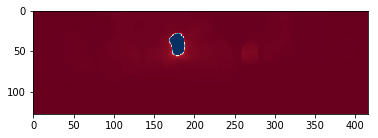

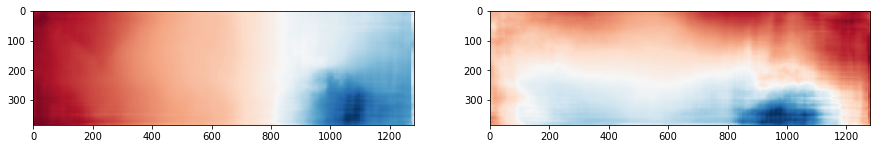

In [25]:
index = 0
visualize_depth(load(builder.dataframe.path_to_depth[index]))
visualize_optical_flow(load(builder.dataframe.path_to_optical_flow[index]))